In [5]:
print('done')

: 

In [4]:
%reset
import sys
import gen_fxns
sys.path.append("/home/aallawala/")
sys.path.append("/home/aallawala/gen_fxns")
import h5py
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import scipy as sp
import sys
from datetime import date
import pandas as pd 
from datetime import timedelta
from scipy.stats import zscore
import seaborn as sns 
import pickle 
import os 

KeyboardInterrupt: 

In [2]:

ptID = 'RCS06'
path_string = Path(f"/userdata/aallawala/pain_data/stage0/{ptID}/mood_biomarker/preproc_data") 

data_root = Path(path_string)
file_keyword = '_wavelet_mean'
dataset_name = "mean_psd"

# Function to extract numeric part from filename
def extract_number(filename):
    return int(''.join(filter(str.isdigit, filename)))

def load_h5_files(path_string, file_keyword, dataset_name):
    import re
    h5_arrays = []
    fileids = [] 
    # Get list of files in directory and sort them based on numeric part
    files = sorted(os.listdir(path_string), key=extract_number)
    
    for filename in files:
        if filename.endswith('.h5') and file_keyword in filename:
            # Construct the full file path
            filepath = os.path.join(path_string, filename)
            print(filepath)
            # Load the .h5 file
            with h5py.File(filepath, 'r') as hf:
                # Assuming you want to load the first dataset from each file
                # Load the dataset as float32
                dataset = np.array(hf[dataset_name], dtype=np.float32)
                # Append the dataset to the list
                h5_arrays.append(dataset)

                # get fileids 
                tmp = re.findall(r'\d+', filepath)
                res = list(map(int, tmp))
                fileid = res[3]
                fileids.append(fileid)


    return h5_arrays, fileids

# try:
#     loaded_datasets = load_h5_files(directory_path, keyword, dataset_name)
#     # Now you can work with loaded_datasets
# except FileNotFoundError:
#     print(f"Directory '{directory_path}' not found.")

h5_arrays,fileids = load_h5_files(path_string, file_keyword, dataset_name)



/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1619_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1620_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1621_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1622_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1623_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1624_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1625_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1626_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RCS06_1627_ieeg_wavelet_mean.h5
/userdata/aallawala/pain_data/stage0/RCS06/mood_biomarker/preproc_data/RC

In [3]:
all_data  = []
all_data = np.stack(h5_arrays, axis=2)
print("freqs x channels x trials:", all_data.shape) 
del h5_arrays

from scipy.stats import zscore
psd_z = zscore(all_data,axis = 2)

ValueError: all input arrays must have the same shape

In [ ]:
filepath = (f'/userdata/aallawala/pain_data/stage0/redcap/stage0_redcap_{ptID}.csv')
# filepath = Path ("/home/jsaal/ppt_files/%s/%s_arm1_df.csv" % (ptID, ptID)) 
raw_surveys = pd.read_csv(filepath)
raw_surveys

,record_id,redcap_event_name,redcap_repeat_instrument,redcap_repeat_instance,redcap_survey_identifier,stim_onoff_timestamp,pt,stimonoff,stim_onoff_complete,scales_vasmpq_timestamp,...,promis_paqual11r,modified_promis_scale_v20_neuropathic_pain_quality_complete,expectations_timestamp,pain_relief,expected_quality_of_life,expectations_complete,dystonia_vas_timestamp,dystonia_vas,run_burke_fahn_marsden,dystonia_vas_complete
0,2039,pain_related_surve_arm_4,NaN,NaN,NaN,9/15/22 12:35:15,7,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2050,vas_arm_1,NaN,NaN,NaN,9/16/22 12:34:36,7,0,2,9/16/22 12:37:38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2051,pain_related_surve_arm_4,NaN,NaN,NaN,9/16/22 12:53:37,7,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9/16/22 13:06:00,50.0,0.0,2.0
3,2052,vas_arm_1,NaN,NaN,NaN,9/16/22 15:13:03,7,0,2,9/16/22 15:15:38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2053,comprehensive_arm_3,NaN,1.0,NaN,9/16/22 18:40:09,7,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2311,vas_arm_1,NaN,NaN,NaN,9/29/22 17:04:11,7,1,2,9/29/22 17:07:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2312,vas_arm_1,NaN,NaN,NaN,9/29/22 18:31:47,7,0,2,9/29/22 18:34:20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2313,vas_arm_1,NaN,NaN,NaN,9/29/22 18:42:57,7,1,2,9/29/22 18:45:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,2314,vas_arm_1,NaN,NaN,NaN,9/29/22 18:55:41,7,1,2,9/29/22 18:59:11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert 'record_id' to string (do this once)
raw_surveys['record_id'] = raw_surveys['record_id'].astype(str)

# Convert fileids to string once
fileids_str = [str(fid) for fid in fileids]

# Check which fileids are missing
missing_ids = list(set(fileids_str) - set(raw_surveys['record_id'].values))

if missing_ids:
    print(f"Missing {len(missing_ids)} IDs: {missing_ids}")
else:
    print("✅ All file IDs are present.")

# Use np.setdiff1d() for more efficient checking of missing IDs
missing_bm_data = np.setdiff1d(raw_surveys['record_id'], fileids_str)  # Survey data missing from neural data
missing_surveys = np.setdiff1d(fileids_str, raw_surveys['record_id'])  # Neural data missing from survey data

# Remove missing survey record ids from neural data
idx_missing_surveys = ~np.isin(fileids_str, missing_surveys)
new_alldata = psd_z[:,:,idx_missing_surveys]

# Remove missing neural data from survey data
idx_missing_neuraldata = ~np.isin(raw_surveys['record_id'], missing_bm_data)
new_surveys = raw_surveys.iloc[idx_missing_neuraldata]

# Ensure dimensions match
assert(new_surveys.shape[0] == new_alldata.shape[2])
print(new_surveys.shape[0])
print(new_alldata.shape[2])


✅ All file IDs are present.
241
241


In [ ]:
print(len(raw_surveys['mood_vas_s0']))
print(len(raw_surveys['hamd_score']))

from scipy.stats import zscore 

mood = new_surveys['mood_vas_s0'].values
hamd = new_surveys['hamd_score'].values
pain = new_surveys['intensity_vas_s0'].values
unpl = new_surveys['unpleasantness_vas_s0'].values
mpq = new_surveys['scales_vasmpq_complete'].values
nrs = new_surveys['nrs_s0'].values
p11 = new_surveys['psc11']
p10 = new_surveys['psc10']
p9 = new_surveys['psc9']
p8 = new_surveys['psc8']
p7 = new_surveys['psc7']
# pcat = new_surveys['pain_catastrophizing_scale_complete']
# mask = ~np.isnan(mood) & ~np.isnan(pain) & ~np.isnan(nrs) & ~np.isnan(unpl) 
# hamd_cleaned = hamd[mask]
# print(len(hamd_cleaned))

mask =  ~np.isnan(pain) & ~np.isnan(p11)

# index out other surveys based on mood surveys. 

index_mask = indices = np.where(mask)[0] 
idx_mood_unshifted = index_mask

# mood_cleaned = zscore(mood[idx_mood_unshifted])
# pain_cleaned = zscore(pain[idx_mood_unshifted])
# unpl_cleaned = zscore(unpl[idx_mood_unshifted])
# mpq_cleaned = zscore(mpq[idx_mood_unshifted])
nrs_cleaned = nrs[idx_mood_unshifted]
# pcat_cleaned = pcat[idx_mood_unshifted]
# hamd_cleaned = hamd[idx_mood_unshifted]

# Compare both (delete this)
# index_mood_shifted = index_mask - 1

# mood_shifted = mood[idx_mood_shifted]
# pain_shifted = mood[idx_mood_shifted]
# unpl_cleaned = unpl[idx_mood_shifted]
# mpq_cleaned = mpq[idx_mood_shifted]
# nrs_cleaned = nrs[idx_mood_shifted]
# pcat_cleaned = pcat[idx_mood_shifted]
# hamd_cleaned = hamd[idx_mood_shifted]



250
250
211


In [313]:
psd_z_cleaned = new_alldata[:,:,idx_mood_unshifted]

Text(0.5, 0, 'mpq')

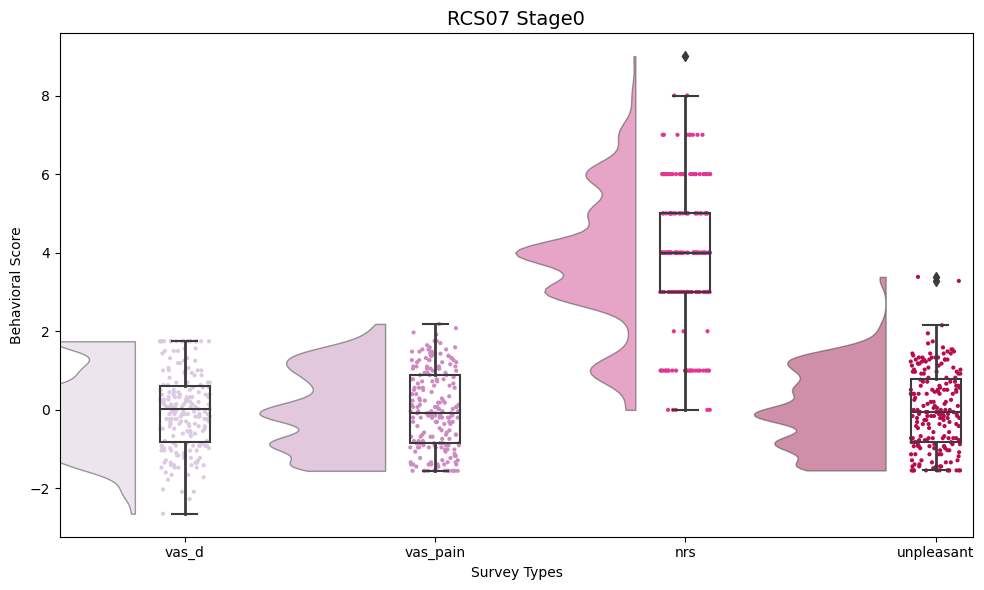

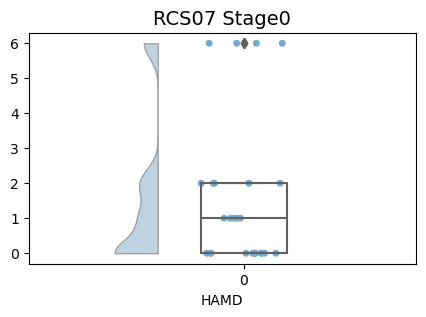

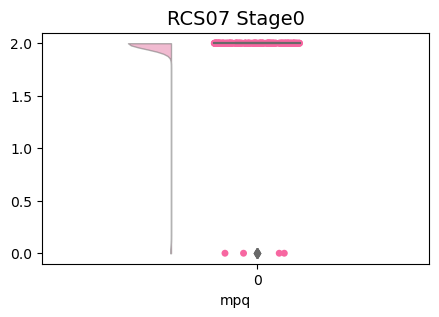

In [305]:

import seaborn as sns
import ptitprince as pt

df = pd.DataFrame({
    "vas_d": mood_cleaned,
    "vas_pain": pain_cleaned,
    "nrs": nrs_cleaned,
    "unpleasant": unpl_cleaned
    # "mpq" : mpq_cleaned
})

df_long = df.melt(var_name='Survey', value_name='Score')

# Create the raincloud plot
fig, ax = plt.subplots(figsize=(10, 6))

pt.RainCloud(x='Survey', y='Score', data=df_long, ax=ax,
             palette="PuRd", width_viol=1.2, width_box=.2,
             point_size=3, alpha=0.5, box_showfliers=True)
# Formatting
ax.set_title(f'{ptID} Stage0', fontsize=14)
ax.set_xlabel("Survey Types")
ax.set_ylabel("Behavioral Score")

# Rotate x-axis labels for readability

plt.tight_layout()

## NOTE: number of trials with hamd and mpq is not equivalent to the other surveys. There likely are not many trials corresponding to biomarker recoridngs ids. 
hamd = new_surveys['hamd_score'].values
hamd_mask = ~np.isnan(hamd)
hamd_cleaned = hamd[hamd_mask]
fig, ax = plt.subplots(figsize=(5, 3))


pt.RainCloud(data=hamd_cleaned, ax=ax,
             palette="PuBu", width_viol=0.2, width_box=0.2,
             point_size=5, alpha=0.5, box_showfliers=True)
ax.set_title(f'{ptID} Stage0', fontsize=14)
ax.set_xlabel("HAMD")

mpq = new_surveys['scales_vasmpq_complete'].values
mpq_mask = ~np.isnan(mpq)
mpq_cleaned = mpq[mpq_mask]
fig, ax = plt.subplots(figsize=(5, 3))

pt.RainCloud(data=mpq_cleaned, ax=ax,
             palette="RdPu", width_viol=0.2, width_box=0.2,
             point_size=5, alpha=0.5, box_showfliers=True)
ax.set_title(f'{ptID} Stage0', fontsize=14)
ax.set_xlabel("mpq")

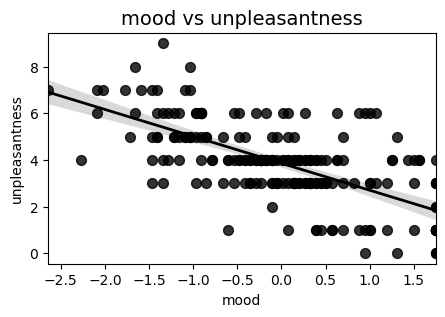

(array([ 11,  12,  59,  60, 150, 171, 177, 179, 180, 181, 186]),)


In [309]:
from sklearn.linear_model import LinearRegression
import scipy.spatial.distance as distance

def get_outliers_plot_linreg(var1, var2, var1_label, var2_label):

    # Assume X and Y are your two behavioral vectors (reshape X to 2D if needed)
    model = LinearRegression().fit(var1.reshape(-1, 1), var2)
    predicted = model.predict(var1.reshape(-1, 1))
    residuals = var2 - predicted

    # Compute threshold
    std_dev = np.std(residuals)
    outlier_mask = np.abs(residuals) > 2 * std_dev
    idx_outlier_stddev = np.where(outlier_mask)

    # Get outlier trials
    X_outliers = var1[outlier_mask]
    Y_outliers = var2[outlier_mask]
    data = pd.DataFrame({"X": var1, "Y": var2})

    # Plot with Confidence Intervals
    fig = plt.figure(figsize=(5, 3))
    sns.regplot(x='X', y='Y', data=data, scatter_kws={'color': 'black', 's': 50}, ci=95, line_kws={'color': 'black', 'lw': 2})

    # Formatting
    plt.title(f'{var1_label} vs {var2_label}', fontsize=14)
    plt.xlabel(f'{var1_label}')
    plt.ylabel(f'{var2_label}')
    plt.show()
 
    # cov_matrix = np.cov(residuals.T)

    # mean_residuals = np.mean(residuals, axis=0)

    # # Compute the inverse of the covariance matrix
    # cov_inv = np.linalg.inv(cov_matrix)

    # # Compute Mahalanobis distance for each point
    # mahalanobis_distances = np.apply_along_axis(lambda x: distance.mahalanobis(x, mean_residuals, cov_inv), 1, residuals)

    # # Identify outliers based on Mahalanobis distance
    # threshold = 3  # Typically, points with a distance > 3 are considered outliers
    # outliers = mahalanobis_distances > threshold

    # # Output the outliers (if any)
    # outlier_mah_idx = np.where(outliers)[0]
    print(idx_outlier_stddev)
    return fig, X_outliers, Y_outliers,     idx_outlier_stddev #outlier_mah_idx

fig, X_outliers, Y_outliers,  idx_outlier_stddev= get_outliers_plot_linreg(mood_cleaned, nrs_cleaned, 'mood', 'unpleasantness')


In [ ]:
# var1 = mood_cleaned
# var2 = pain_cleaned

# model = LinearRegression().fit(var1.reshape(-1, 1), var2)
# predicted = model.predict(var1.reshape(-1, 1))
# residuals = var2 - predicted

# cov_matrix = np.cov(residuals.T)

# mean_residuals = np.mean(residuals, axis=0)

# # Compute the inverse of the covariance matrix
# cov_inv = np.linalg.inv(cov_matrix)

# # Compute Mahalanobis distance for each point
# mahalanobis_distances = np.apply_along_axis(lambda x: distance.mahalanobis(x, mean_residuals, cov_inv), 1, residuals)

# # Identify outliers based on Mahalanobis distance
# threshold = 3  # Typically, points with a distance > 3 are considered outliers
# outliers = mahalanobis_distances > threshold

# # Output the outliers (if any)
# outlier_mah_idx = np.where(outliers)[0]

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [315]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assume that neural data (X) and behavioral data (Y) are numpy arrays
# Neural data (X): shape (n_samples, n_features)
# Behavioral data (Y): shape (n_samples, n_outputs)
X = psd_z_cleaned
Y = mood_cleaned
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming neural_data (X) is a 3D array: (n_samples, n_channels, n_features)
# behavioral_data (Y) is a 2D array: (n_samples, n_outputs)

# X: Shape (n_samples, n_channels, n_features)
# Y: Shape (n_samples, n_outputs)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Prepare storage for results
coefficients = []  # To store coefficients for each feature/channel
predictions = []   # To store predictions for each feature/channel
mse_scores = []     # To store MSE for each feature/channel

# Loop over each channel (or feature, depending on your data structure)
for channel in range(X.shape[1]):  # Loop over channels
    # Get the data for the current channel (assuming X is in shape [samples, channels, features])
    X_channel = X[:, channel, :]  # Shape (n_samples, n_features)

    # Fit the Ridge regression model
    ridge_model.fit(X_channel, Y)  # Fit the model for the current channel

    # Get the predictions
    Y_pred = ridge_model.predict(X_channel)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(Y, Y_pred)
    mse_scores.append(mse)

    # Store the coefficients for the current channel
    coefficients.append(ridge_model.coef_)

    # Store the predictions for the current channel
    predictions.append(Y_pred)

    # Plot Actual vs Predicted for the current channel
    plt.figure(figsize=(6, 4))
    plt.scatter(Y, Y_pred, label=f'Channel {channel}')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Channel {channel} - Actual vs Predicted (Ridge)')
    plt.legend()
    plt.show()

# Optionally: Plot MSE for each channel
plt.figure(figsize=(8, 5))
plt.bar(range(len(mse_scores)), mse_scores, color='skyblue')
plt.xlabel('Channel')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Ridge Regression across Channels')
plt.show()

# Optionally: Inspect Coefficients
for i, coef in enumerate(coefficients):
    print(f"Coefficients for Channel {i}:\n", coef)


ValueError: Found input variables with inconsistent numbers of samples: [40, 211]